In [1]:
#packages 
from sympy.interactive import printing

import scipy
from scipy import optimize, integrate, fftpack, pi

import numpy as np

import pylab
import math

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

printing.init_printing(use_latex=True)

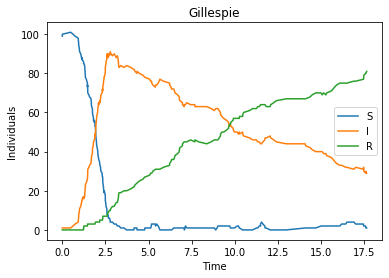

In [49]:
#Starting parameters
beta = 3
gamma = 0.1
mu = 1/80
timesteps = 250

def Gillespie(y):
    X, Y, Z = y
    N = np.sum(y)
    events = np.zeros((6))
    changes = np.zeros((6,3))
    
    #EVENTS
    events[0] = mu*N; changes[0,:]=np.array([+1,0,0]) #Birth
    events[1] = beta*X*Y/N; changes[1,:]=np.array([-1,+1,0]) #Transmission
    events[2] = gamma*Y; changes[2,:]=np.array([0,-1,+1]) #Recovery
    events[3] = mu*X; changes[3,:]=np.array([-1,0,0]) #Death X
    events[4] = mu*Y; changes[4,:]=np.array([0,-1,0]) #Death Y
    events[5] = mu*Z; changes[5,:]=np.array([0,0,-1]) #Death Z
          
    #rate at which an event occurs 
    R_total = np.sum(events)
    R_1 = np.random.rand()
    dt = -1 * math.log(R_1) / R_total

    #set P
    R_2 = np.random.rand()
    P = R_2 * R_total

    #Event p occurs if (STEP 6 page 201)
    cumsum_rate = np.cumsum(events)
    event = 0
    for p, sum_rate_p in enumerate(cumsum_rate):
        if P > sum_rate_p:
            event = p + 1
    
    return [changes[event], dt]         

time = np.zeros((timesteps))
populations = np.zeros((timesteps, 3))
populations[0] = np.array([99, 1, 0])
for t in range(timesteps - 1):
    change, dt = Gillespie(populations[t])
    populations[t + 1] = populations[t] + change
    time[t + 1] = time[t] + dt

plt.figure()
plt.plot(time, populations)
plt.title(f'Gillespie')
plt.legend(['S', 'I', 'R'])
plt.xlabel('Time')
plt.ylabel('Individuals')
plt.show()